# Run All

## Import dan Load

Import library yang dibutuhkan

In [54]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import rcParams
import warnings

from scipy.fft import fft, fftfreq
from scipy.signal import filtfilt
from scipy import stats
import scipy

Mengganti Style

In [55]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

In [56]:
df_jalan = pd.read_excel('https://drive.google.com/uc?id=13rLxAPa4M0IWrC1xqjbNWALmKd3gY6LL')

## Preprocessing

Mengubah nama kolom

In [57]:
df_jalan.rename(columns={'Time (s)':'Time', 'Linear Acceleration x (m/s^2)':'SumbuX','Linear Acceleration y (m/s^2)':'SumbuY', 'Linear Acceleration z (m/s^2)' : 'SumbuZ'}, inplace=True)
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014520,-0.030124,0.038652
1,0.072605,-0.008532,-0.008645,0.011974
2,0.087559,-0.001474,0.016658,0.028989


Menolkan sinyal sumbu Y

In [58]:
df_jalan['SumbuZ'] = df_jalan['SumbuZ'] - (df_jalan['SumbuZ'].sum() / df_jalan['SumbuZ'].shape[0])
df_jalan['SumbuY'] = df_jalan['SumbuY'] - (df_jalan['SumbuY'].sum() / df_jalan['SumbuY'].shape[0])
df_jalan['SumbuX'] = df_jalan['SumbuX'] - (df_jalan['SumbuX'].sum() / df_jalan['SumbuX'].shape[0])
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014465,-0.030319,0.038544
1,0.072605,-0.008588,-0.008840,0.011865
2,0.087559,-0.001530,0.016463,0.028880


## Milestone 1

### Visualisasi (Soal Nomor 1)

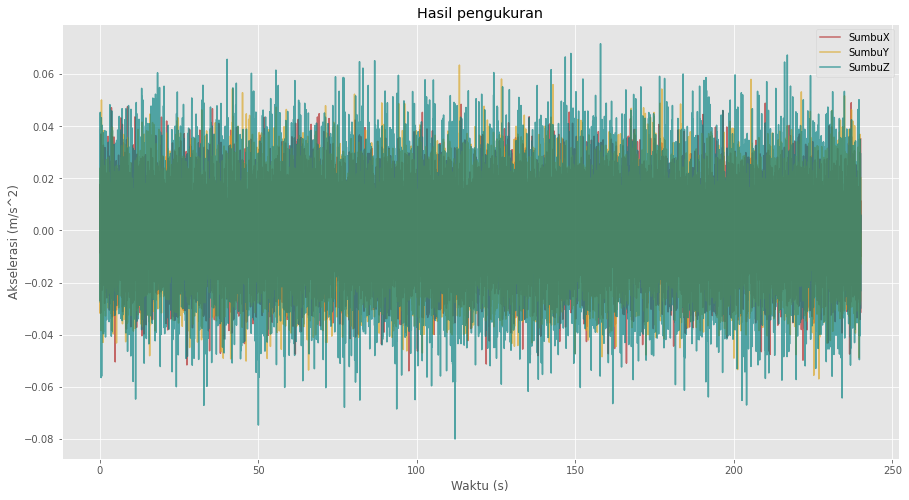

In [59]:
df_jalan.plot(x='Time', alpha=0.65, color=['firebrick', 'goldenrod', 'teal'])
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

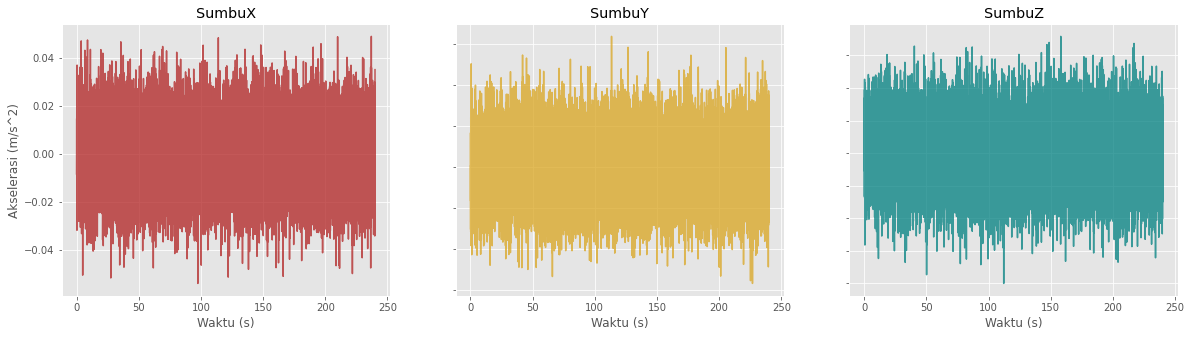

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(df_jalan['Time'], df_jalan['SumbuX'], color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(df_jalan['Time'], df_jalan['SumbuY'], color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(df_jalan['Time'], df_jalan['SumbuZ'], color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Waktu (s)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

### Sumbu Dominan (Soal Nomor 3)

In [61]:
df_jalan.describe()

,Time,SumbuX,SumbuY,SumbuZ
count,16084.000000,1.608400e+04,1.608400e+04,1.608400e+04
mean,120.031186,-1.911173e-19,-4.645810e-20,-2.408919e-19
std,69.274905,1.399827e-02,1.517950e-02,1.930380e-02
min,0.057713,-5.392940e-02,-5.698689e-02,-8.010216e-02
25%,60.042470,-9.389974e-03,-1.026513e-02,-1.306625e-02
50%,120.029900,1.065587e-04,4.474263e-05,-2.300322e-04
75%,180.019274,9.473250e-03,1.011197e-02,1.284651e-02
max,240.009787,4.901828e-02,6.349317e-02,7.170753e-02


Sumbu Z yang paling dominan saat kendaraan lewat, karena memiliki nilai minimal dan maksimal yang paling rendah/tinggi

## Milestone 2

### Tabel Pengamatan

In [62]:
df_kendaraan = pd.read_excel('https://drive.google.com/uc?id=1Sz0iPSLLnbOLRPi-RPVhlF6p80AFVF6z')
df_kendaraan.head()

,Time,Kendaraan
0,0.00,Motor
1,3.33,Motor
2,5.07,Motor
3,9.80,Motor
4,10.27,Motor


In [63]:
df_kendaraan.groupby('Kendaraan').count()

,Time
Kendaraan,
Mobil,19
Motor,112
Truk,1


### FFT (Soal Nomor 1)

In [64]:
N = df_jalan.shape[0]
freq = N/240
bagi_dua = N // 2

yf_sumbuX = fft(np.array(df_jalan['SumbuX']))[:bagi_dua]
xf_sumbuX = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuY = fft(np.array(df_jalan['SumbuY']))[:bagi_dua]
xf_sumbuY = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuZ = fft(np.array(df_jalan['SumbuZ']))[:bagi_dua]
xf_sumbuZ = fftfreq(N, 1 / freq)[:bagi_dua]


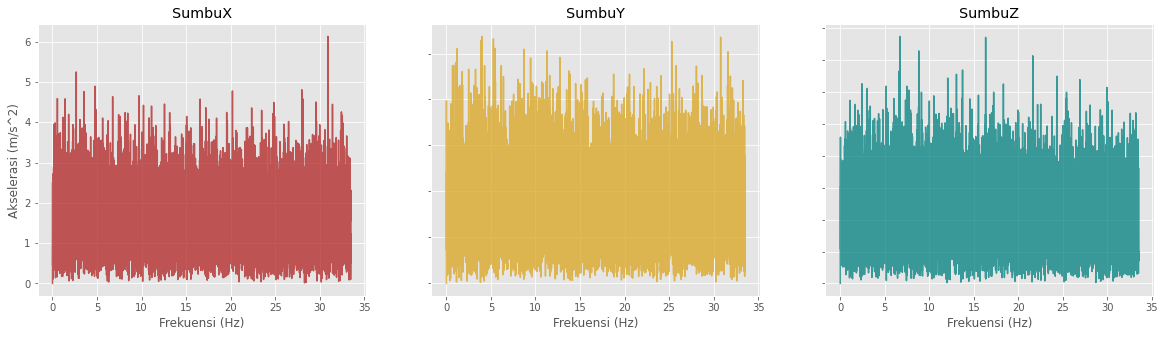

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(xf_sumbuX, np.abs(yf_sumbuX), color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(xf_sumbuY, np.abs(yf_sumbuY), color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(xf_sumbuZ, np.abs(yf_sumbuZ), color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Frekuensi (Hz)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

### Filter (Soal Nomor 3)

In [66]:
#Band-pass filter
fs = 240.0
lowcut = 2.0
highcut = 5.0

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

order = 2

b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog=False)
z_ybpf = scipy.signal.filtfilt(b, a, df_jalan['SumbuZ'], axis=0)
x_ybpf = scipy.signal.filtfilt(b, a, df_jalan['SumbuX'], axis=0)
y_ybpf = scipy.signal.filtfilt(b, a, df_jalan['SumbuY'], axis=0)

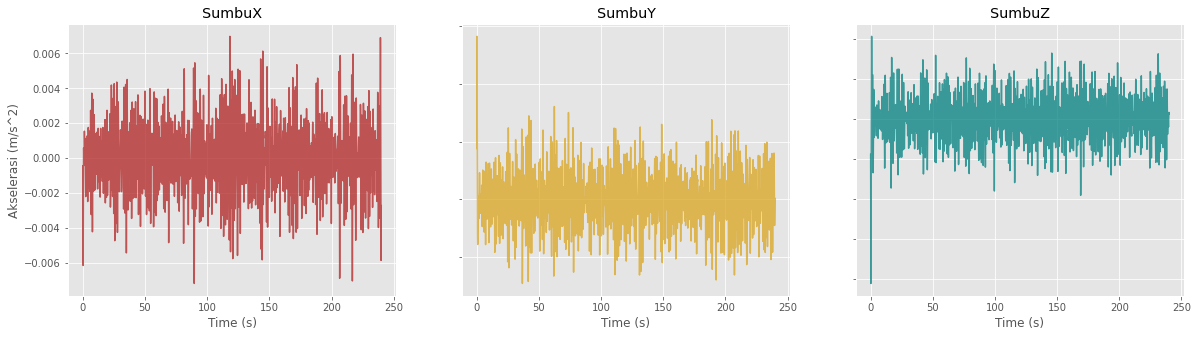

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(df_jalan['Time'], x_ybpf, color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(df_jalan['Time'], y_ybpf, color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(df_jalan['Time'], z_ybpf, color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

FFT setelah Filtering

In [68]:
N = df_jalan.shape[0]
freq = N/240
bagi_dua = N // 2

yf_sumbuX_filter = fft(np.array(x_ybpf))[:bagi_dua]
xf_sumbuX_filter = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuY_filter = fft(np.array(y_ybpf))[:bagi_dua]
xf_sumbuY_filter = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuZ_filter = fft(np.array(z_ybpf))[:bagi_dua]
xf_sumbuZ_filter = fftfreq(N, 1 / freq)[:bagi_dua]


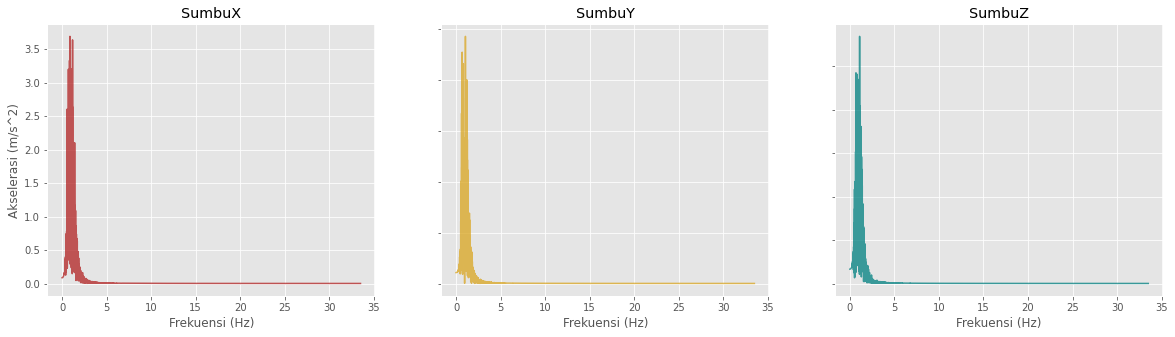

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(xf_sumbuX_filter, np.abs(yf_sumbuX_filter), color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(xf_sumbuY_filter, np.abs(yf_sumbuY_filter), color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(xf_sumbuZ_filter, np.abs(yf_sumbuZ_filter), color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Frekuensi (Hz)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

Lebih Detail

In [70]:
for i in range (len(xf_sumbuX_filter)):
  if(xf_sumbuX_filter[i] > 4):
    print(i)
    break

for i in range (len(xf_sumbuY_filter)):
  if(xf_sumbuY_filter[i] > 4):
    print(i)
    break

for i in range (len(xf_sumbuZ_filter)):
  if(xf_sumbuZ_filter[i] > 4):
    print(i)
    break

961
961
961


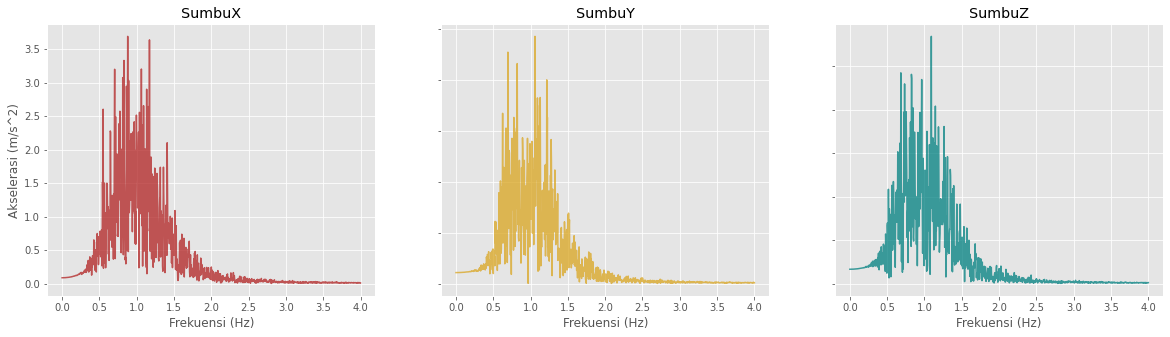

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(xf_sumbuX_filter[0:961], np.abs(yf_sumbuX_filter)[0:961], color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(xf_sumbuY_filter[0:961], np.abs(yf_sumbuY_filter)[0:961], color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(xf_sumbuZ_filter[0:961], np.abs(yf_sumbuZ_filter)[0:961], color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Frekuensi (Hz)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

## Milestone 3

### Melakukan Estimasi untuk Klasifikasi Kendaraan (Soal Nomor 1)

Menambah kolom sebagai penanda

In [72]:
titik_penanda = np.zeros(len(df_kendaraan))
df_kendaraan['Titik Penanda'] = titik_penanda
df_kendaraan.head()

,Time,Kendaraan,Titik Penanda
0,0.00,Motor,0.0
1,3.33,Motor,0.0
2,5.07,Motor,0.0
3,9.80,Motor,0.0
4,10.27,Motor,0.0


Mengelompokkan berdasarkan jenis kendaraan

In [73]:
motor = df_kendaraan[df_kendaraan['Kendaraan'] == 'Motor']
mobil = df_kendaraan[df_kendaraan['Kendaraan'] == 'Mobil']
truk = df_kendaraan[df_kendaraan['Kendaraan'] == 'Truk']

Visualisasi

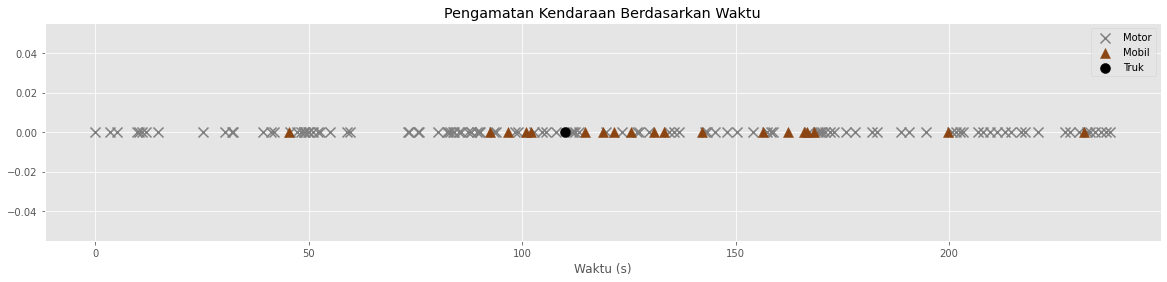

In [74]:
plt.figure(figsize=(20,4))
plt.scatter(x=motor['Time'], y=motor['Titik Penanda'], marker='x', s=100, color='gray')
plt.scatter(x=mobil['Time'], y=mobil['Titik Penanda'], marker='^', s=100, color='saddlebrown')
plt.scatter(x=truk['Time'], y=truk['Titik Penanda'], marker='o', s=100, color='black')
plt.legend(['Motor', 'Mobil', 'Truk'])
plt.title('Pengamatan Kendaraan Berdasarkan Waktu')
plt.xlabel('Waktu (s)')
plt.show()

Membuat Tabel Dataframe baru untuk sinyal yang sudah difilter

In [75]:
df_jalan_filter = df_jalan
df_jalan_filter['SumbuX'] = x_ybpf
df_jalan_filter['SumbuY'] = y_ybpf
df_jalan_filter['SumbuZ'] = z_ybpf
df_jalan.head()

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,-0.000436,0.004401,-0.004424
1,0.072605,-0.001121,0.005719,-0.006177
2,0.087559,-0.001789,0.006977,-0.007876
3,0.102421,-0.002432,0.008161,-0.009506
4,0.117374,-0.003042,0.009258,-0.011052


Visualisasi Sumbu X

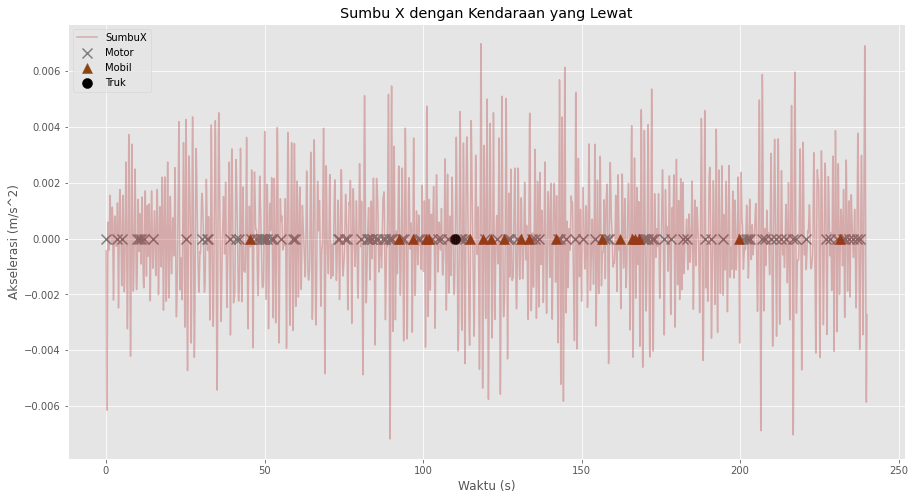

In [76]:
df_jalan_filter[['SumbuX', 'Time']].plot(x='Time', color='firebrick', alpha=0.3)
plt.scatter(x=motor['Time'], y=motor['Titik Penanda'], marker='x', s=100, color='gray', label='Motor')
plt.scatter(x=mobil['Time'], y=mobil['Titik Penanda'], marker='^', s=100, color='saddlebrown', label='Mobil')
plt.scatter(x=truk['Time'], y=truk['Titik Penanda'], marker='o', s=100, color='black', label='Truk')
plt.legend()
plt.title('Sumbu X dengan Kendaraan yang Lewat')
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

Visualisasi Sumbu Y

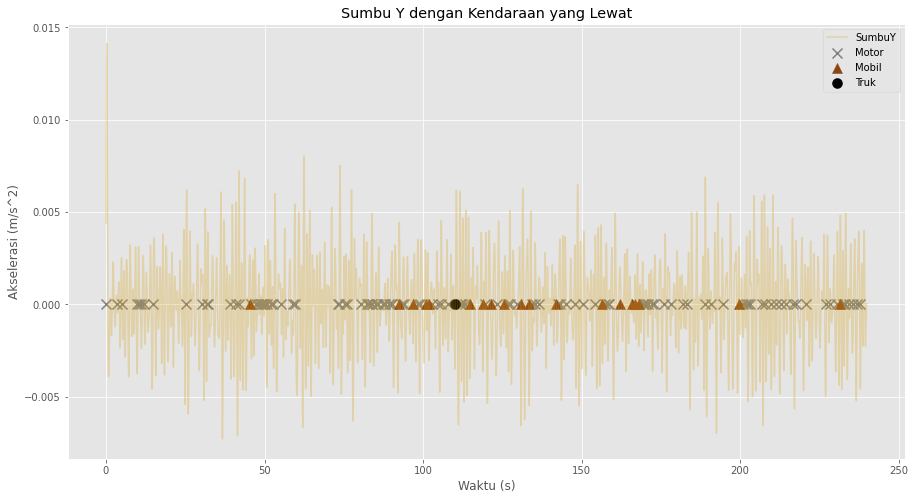

In [77]:
df_jalan_filter[['SumbuY', 'Time']].plot(x='Time', color='goldenrod', alpha=0.3)
plt.scatter(x=motor['Time'], y=motor['Titik Penanda'], marker='x', s=100, color='gray', label='Motor')
plt.scatter(x=mobil['Time'], y=mobil['Titik Penanda'], marker='^', s=100, color='saddlebrown', label='Mobil')
plt.scatter(x=truk['Time'], y=truk['Titik Penanda'], marker='o', s=100, color='black', label='Truk')
plt.legend()
plt.title('Sumbu Y dengan Kendaraan yang Lewat')
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

Visualisasi Sumbu Z

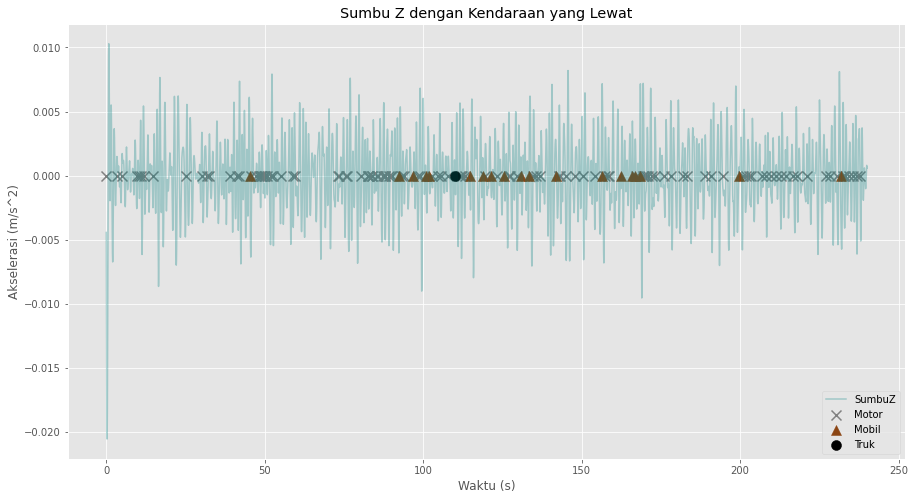

In [78]:
df_jalan_filter[['SumbuZ', 'Time']].plot(x='Time', color='teal', alpha=0.3)
plt.scatter(x=motor['Time'], y=motor['Titik Penanda'], marker='x', s=100, color='gray', label='Motor')
plt.scatter(x=mobil['Time'], y=mobil['Titik Penanda'], marker='^', s=100, color='saddlebrown', label='Mobil')
plt.scatter(x=truk['Time'], y=truk['Titik Penanda'], marker='o', s=100, color='black', label='Truk')
plt.legend()
plt.title('Sumbu Z dengan Kendaraan yang Lewat')
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

Mencari korelasi untuk mengambil hanya 2 sumbu yang relevan

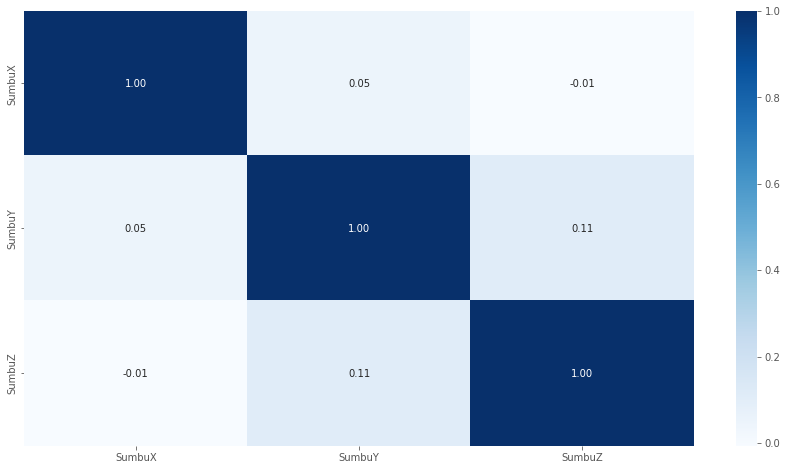

In [79]:
sns.heatmap(df_jalan_filter[['SumbuX', 'SumbuY', 'SumbuZ']].abs().corr(), cmap='Blues', annot=True, fmt='.2f')

Deskripsi untuk membantu menentukan nilai

In [80]:
df_jalan_filter.abs().describe()

,Time,SumbuX,SumbuY,SumbuZ
count,16084.000000,1.608400e+04,1.608400e+04,1.608400e+04
mean,120.031186,1.570737e-03,1.907946e-03,2.214990e-03
std,69.274905,1.217501e-03,1.482605e-03,1.767838e-03
min,0.057713,5.239604e-07,5.970419e-08,3.008846e-08
25%,60.042470,6.233217e-04,7.563648e-04,8.847562e-04
50%,120.029900,1.300137e-03,1.586538e-03,1.830242e-03
75%,180.019274,2.224984e-03,2.749709e-03,3.162777e-03
max,240.009787,7.181801e-03,1.410892e-02,2.053672e-02


Membuat DataFrame baru untuk Fuzzy Logic dengan melakukan Absolute (mutlak) untuk nilainya dan mengkalikan dengan 1000 untuk mempermudah penghitungan

In [81]:
df_fuzzy = df_jalan_filter[['Time', 'SumbuY', 'SumbuZ']]
df_fuzzy['SumbuY'] = df_fuzzy['SumbuY'].abs() * 10000
df_fuzzy['SumbuZ'] = df_fuzzy['SumbuZ'].abs() * 10000
df_fuzzy.describe()

,Time,SumbuY,SumbuZ
count,16084.000000,16084.000000,16084.000000
mean,120.031186,19.079456,22.149897
std,69.274905,14.826046,17.678383
min,0.057713,0.000597,0.000301
25%,60.042470,7.563648,8.847562
50%,120.029900,15.865385,18.302418
75%,180.019274,27.497092,31.627771
max,240.009787,141.089227,205.367202


Batas: <br>
Truk  : SumbuY >=50 dan SumbuZ >=50 <br>
Mobil : 28 <= SumbuY <= 49 dan 31 <= SumbuZ < 49 <br>
Motor : SumbuY < 28 dan SumbuZ < 31

### Membership Function (Soal Nomor 2)

Fungsi Keangotaan Linier

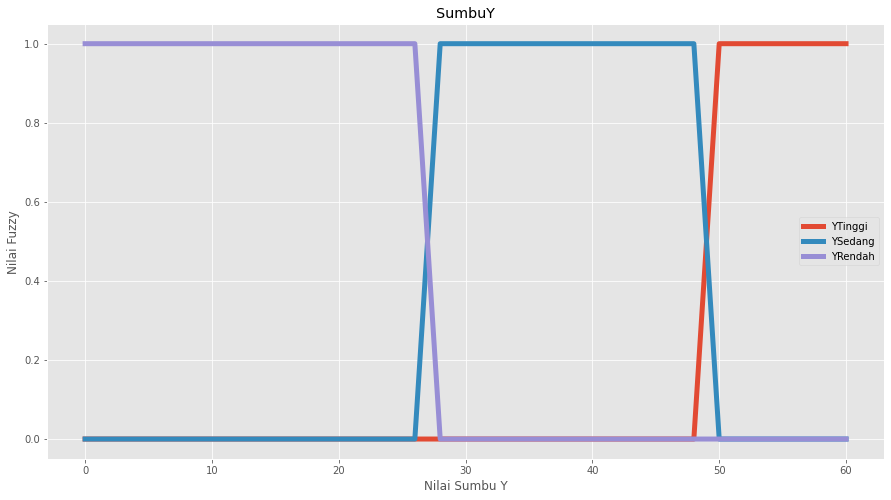

In [82]:
nilai_fuzzy_y1 = [0, 0, 1, 1]
nilai_fuzzy_y2 = [0, 0, 1, 1, 0, 0]
nilai_fuzzy_y3 = [1, 1, 0, 0]
besar_sumbu_y1 = [0, 48, 50, 60]
besar_sumbu_y2 = [0, 26, 28, 48, 50, 60]
besar_sumbu_y3 = [0, 26, 28, 60]
plt.plot(besar_sumbu_y1, nilai_fuzzy_y1, linewidth=5, label='YTinggi')
plt.plot(besar_sumbu_y2, nilai_fuzzy_y2, linewidth=5, label='YSedang')
plt.plot(besar_sumbu_y3, nilai_fuzzy_y3, linewidth=5, label='YRendah')
plt.title('SumbuY')
plt.xlabel('Nilai Sumbu Y')
plt.ylabel('Nilai Fuzzy')
plt.legend()
plt.show()

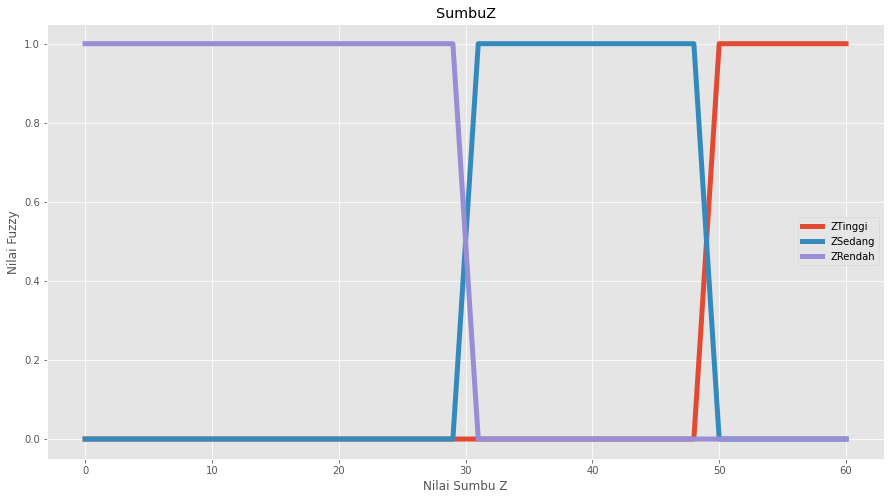

In [83]:
nilai_fuzzy_z1 = [0, 0, 1, 1]
nilai_fuzzy_z2 = [0, 0, 1, 1, 0, 0]
nilai_fuzzy_z3 = [1, 1, 0, 0]
besar_sumbu_z1 = [0, 48, 50, 60]
besar_sumbu_z2 = [0, 29, 31, 48, 50, 60]
besar_sumbu_z3 = [0, 29, 31, 60]
plt.plot(besar_sumbu_z1, nilai_fuzzy_z1, linewidth=5, label='ZTinggi')
plt.plot(besar_sumbu_z2, nilai_fuzzy_z2, linewidth=5, label='ZSedang')
plt.plot(besar_sumbu_z3, nilai_fuzzy_z3, linewidth=5, label='ZRendah')
plt.title('SumbuZ')
plt.xlabel('Nilai Sumbu Z')
plt.ylabel('Nilai Fuzzy')
plt.legend()
plt.show()

Inference atau Fuzzy Rule

SumbuY | SumbuZ | Output
--|--|--
YTinggi | ZTinggi | Truk
YTinggi | ZSedang | Mobil
YTinggi | ZRendah | Mobil
YSedang | ZTinggi | Mobil
YSedang | ZSedang | Mobil
YSedang | ZRendah | Motor
YRendah | ZTinggi | Mobil
YRendah | ZSedang | Motor
YRendah | ZRendah | Motor

Defuzzifikasi Takagi-Sugeno

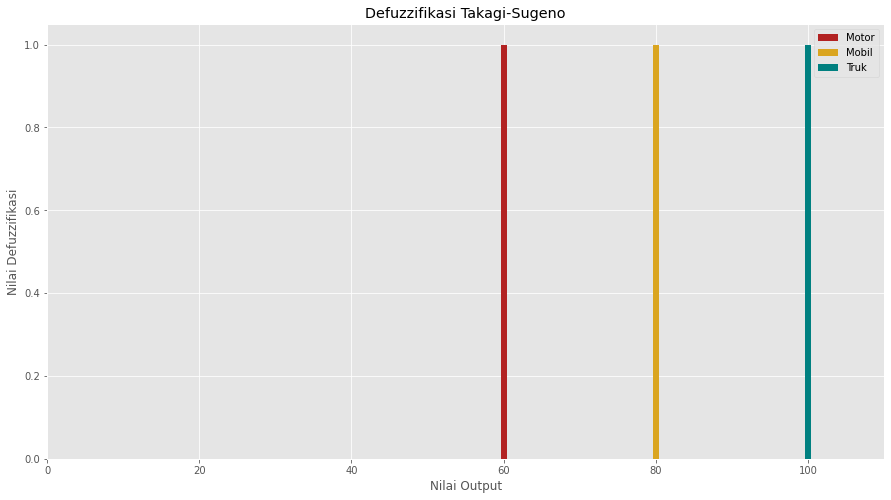

In [84]:
motor = [60]
mobil = [80]
truk = [100]
nilai_defuzz = [1]
colors = ['firebrick', 'goldenrod', 'teal']
plt.bar(motor, nilai_defuzz, color='firebrick', label='Motor')
plt.bar(mobil, nilai_defuzz, color='goldenrod', label='Mobil')
plt.bar(truk, nilai_defuzz, color='teal', label='Truk')
plt.xlim(0,110)
plt.title('Defuzzifikasi Takagi-Sugeno')
plt.xlabel('Nilai Output')
plt.ylabel('Nilai Defuzzifikasi')
plt.legend()
plt.show()

In [104]:
#Fuzzyfication Sumbu Y
def fuzzyficationY(Y):
  if Y >= 50:
    vTinggi = 1.0
    vSedang = 0
    vRendah = 0
  if Y <= 48 and Y >= 28:
    vTinggi = 0
    vSedang = 1.0
    vRendah = 0
  if Y <= 26 and Y >= 0:
    vTinggi = 0
    vSedang = 0
    vRendah = 1.0
  if Y < 28 and Y > 26:
    vTinggi = 0
    vSedang = (28-Y)/(28-26)
    vRendah = (Y-26)/(28-26)
  if Y < 50 and Y > 48:
    vTinggi = (50-Y)/(50-48)
    vSedang = (Y-48)/(50-48)
    vRendah = 0

  #hasil
  if vTinggi >= vSedang:
    return 'YTinggi'
  if vSedang >= vRendah:
    return 'YSedang'
  if vRendah >= vSedang:
    return 'YRendah'
  if vSedang >= vTinggi:
    return 'YSedang'

In [105]:
#Fuzzyfication Sumbu Z
def fuzzyficationZ(Z):
  if Z >= 50:
    vTinggi = 1.0
    vSedang = 0
    vRendah = 0
  if Z <= 48 and Z >= 31:
    vTinggi = 0
    vSedang = 1.0
    vRendah = 0
  if Z <= 29 and Z >= 0:
    vTinggi = 0
    vSedang = 0
    vRendah = 1.0
  if Z < 31 and Z > 29:
    vTinggi = 0
    vSedang = (31-Z)/(31-29)
    vRendah = (Z-29)/(31-29)
  if Z < 50 and Z > 48:
    vTinggi = (50-Z)/(50-48)
    vSedang = (Z-48)/(50-48)
    vRendah = 0

  #hasil
  if vTinggi >= vSedang:
    return 'ZTinggi'
  if vSedang >= vRendah:
    return 'ZSedang'
  if vRendah >= vSedang:
    return 'ZRendah'
  if vSedang >= vTinggi:
    return 'ZSedang'